In [1]:
from tensorflow.keras.datasets import reuters

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
print('Train data : {}'.format(len(X_train)))
print('Test data : {}'.format(len(X_test)))
num_classes = max(Y_train) + 1
print('class : {}'.format(num_classes))

Train data : 8982
Test data : 2246
class : 46


In [3]:
word_index = reuters.get_word_index()

565248/550378 [==============================] - 0s 0us/step


In [4]:
index_word={}
for key,value in word_index.items():
  index_word[value] = key

from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [5]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [6]:
model = Sequential()
model.add(Embedding(1000,120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode = 'max', save_best_only =True)
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics = ['acc'])

In [7]:
history= model.fit(X_train, Y_train, batch_size=128, epochs=30, callbacks=[es,mc], validation_split=0.2)

Epoch 1/30
57/57 [==============================] - 9s 20ms/step - loss: 2.6549 - acc: 0.3454 - val_loss: 2.4079 - val_acc: 0.3450
Epoch 2/30
57/57 [==============================] - 1s 10ms/step - loss: 2.2290 - acc: 0.4163 - val_loss: 2.0577 - val_acc: 0.4825
Epoch 3/30
57/57 [==============================] - 1s 11ms/step - loss: 2.0399 - acc: 0.4917 - val_loss: 2.0094 - val_acc: 0.4986
Epoch 4/30
57/57 [==============================] - 1s 11ms/step - loss: 1.9669 - acc: 0.5061 - val_loss: 1.9989 - val_acc: 0.4647
Epoch 5/30
57/57 [==============================] - 1s 10ms/step - loss: 1.8524 - acc: 0.5168 - val_loss: 1.7986 - val_acc: 0.5326
Epoch 6/30
57/57 [==============================] - 1s 10ms/step - loss: 1.7246 - acc: 0.5564 - val_loss: 1.7593 - val_acc: 0.5409
Epoch 7/30
57/57 [==============================] - 1s 10ms/step - loss: 1.6673 - acc: 0.5669 - val_loss: 1.6921 - val_acc: 0.5582
Epoch 8/30
57/57 [==============================] - 1s 10ms/step - loss: 1.6337 - a

In [8]:
loaded = load_model('best_model.h5')
print("\n 테스트정확도 : %.4f" % (loaded.evaluate(X_test, Y_test)[1]))

71/71 [==============================] - 1s 5ms/step - loss: 1.3180 - acc: 0.6906

 테스트정확도 : 0.6906


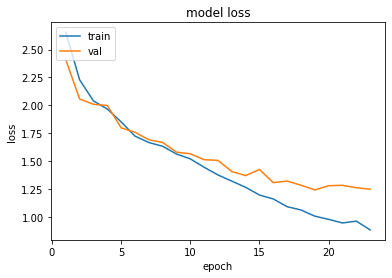

In [9]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()